In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Boston dataset from local file
df = pd.read_csv("/content/1_boston_housing.csv")  # Change filename if necessary
X = df.iloc[:, :-1].values  # Features
y = df.iloc[:, -1].values   # Target (House Prices)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (Standardization for better training)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build Deep Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Linear output for regression
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate model performance
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.4f}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 584.6985 - mae: 22.3238 - val_loss: 464.7623 - val_mae: 19.8068
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 490.0156 - mae: 20.1172 - val_loss: 366.6446 - val_mae: 17.2812
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 383.1545 - mae: 17.2483 - val_loss: 222.7541 - val_mae: 13.0934
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 260.1586 - mae: 13.2199 - val_loss: 93.5549 - val_mae: 8.0051
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 106.4738 - mae: 8.1094 - val_loss: 49.5646 - val_mae: 5.2929
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 60.5860 - mae: 5.8277 - val_loss: 35.4501 - val_mae: 4.1999
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 39.1480 - mae: 4.4680 - val_loss: 29.2860 - val_mae: 3.7030
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.8731 - mae: 3.8272 - val_loss: 26.2896 - val_mae: 3.4612
Epoch 9/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4m

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get model predictions
y_pred = model.predict(X_test).flatten()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


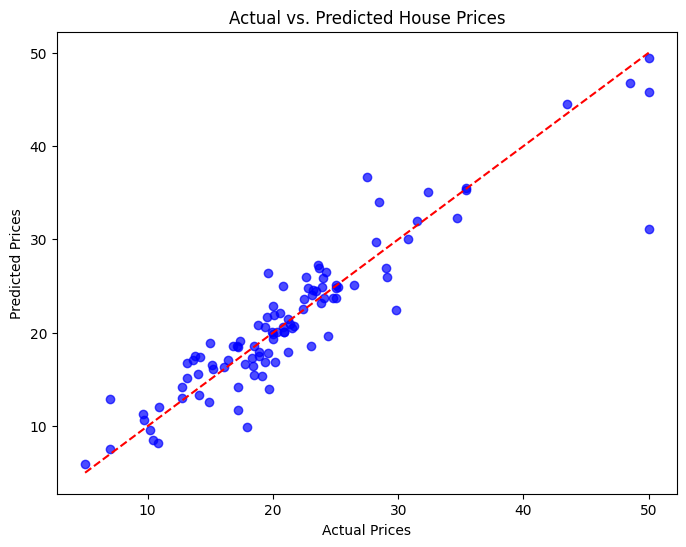

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')  # Ideal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()


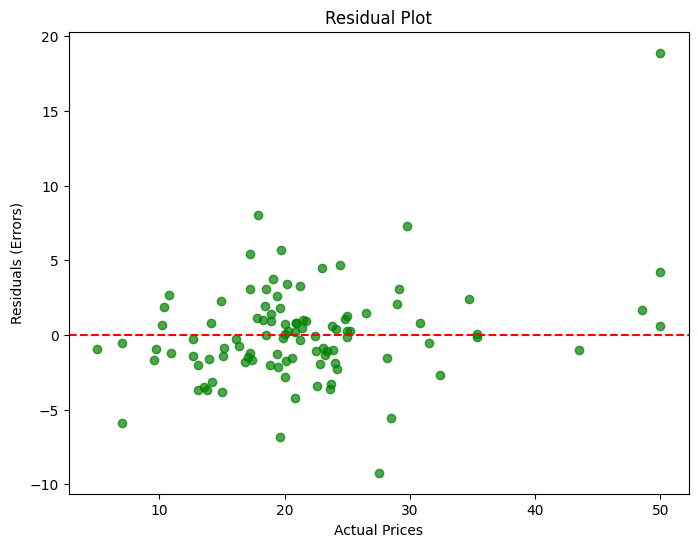

In [5]:
# 2️⃣ Residual Plot: Errors
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Actual Prices")
plt.ylabel("Residuals (Errors)")
plt.title("Residual Plot")
plt.show()


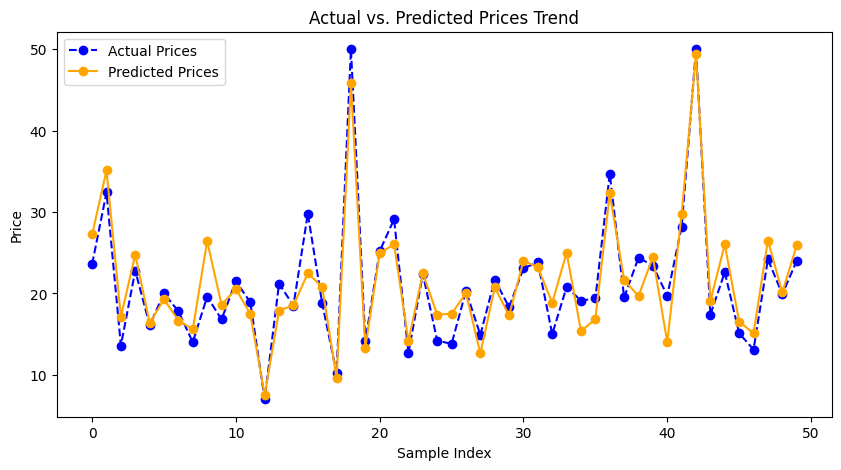

In [7]:
# 4️⃣ Line Plot: Comparing Predicted vs. Actual Trends
plt.figure(figsize=(10, 5))
plt.plot(y_test[:50], label="Actual Prices", marker='o', linestyle='dashed', color='blue')
plt.plot(y_pred[:50], label="Predicted Prices", marker='o', linestyle='solid', color='orange')
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("Actual vs. Predicted Prices Trend")
plt.legend()
plt.show()
